In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

fillers = set(stopwords.words('english'))

In [3]:
model = loadGloveModel("./glove.6B.300d.txt")

Loading Glove Model
Done. 400000  words loaded!


In [34]:
def gen_score(document):
    score = np.zeros_like(model["dog"])
    length = 0
    with open(document) as doc:
        word_count = 0
        for line in doc:
            for word in line.split():
                word = ''.join([i for i in word if i.isalpha()]).lower()
                if word in model and word not in fillers:
                    score += model[word]
                    word_count += 1
                    last = word
    return score/ word_count

In [82]:
def get_distance(document1, document2):
    vec1 = np.array(document1)
    vec2 = np.array(document2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    similarity = np.dot(vec1, vec2)
    return (1 - (similarity / (norm1 * norm2)))

def heatmap(distances, doc_names):
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(distances, cmap=plt.cm.jet)

    ax.set_xticklabels(doc_names, minor=False)
    ax.set_yticklabels(doc_names, minor=False)
    ax.xaxis.tick_top()
    plt.xticks(np.arange(0.5,9.5), rotation=90)
    plt.yticks(np.arange(0.5,9.5))
    ax.set_xticks(np.arange(9), minor=True)
    ax.set_yticks(np.arange(9), minor=True)
    plt.grid(which="minor",linewidth=2, color = "black")
    plt.show()
    plt.close()
    return

def scatterplot(x_axis, y_axis, data, documents):
    x = []
    y = []
    for point in data:
        x.append(get_distance(model[x_axis], point))
        y.append(get_distance(model[y_axis], point))
    x = np.array(x)
    y = np.array(y)
    coloration = np.arange(9)
    fig, ax = plt.subplots()
    plt.axis([min(x),max(x),min(y),max(y)])
    ax.scatter(x,y, c=coloration,cmap=plt.cm.viridis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

    for i, document in enumerate(documents):
        ax.annotate(document[:3], (x[i], y[i]))

    plt.show()
    plt.close()
    return

def linegraph(y_axis, data, documents):
    fig, ax = plt.subplots()
    for label in y_axis:
        distances = []
        for point in data:
            distances.append(get_distance(point, model[label]))
        plt.plot(distances,label=label)
    ax.set_xticklabels(documents)
    ax.set_xticks(np.arange(9))
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()
    plt.close()
    return

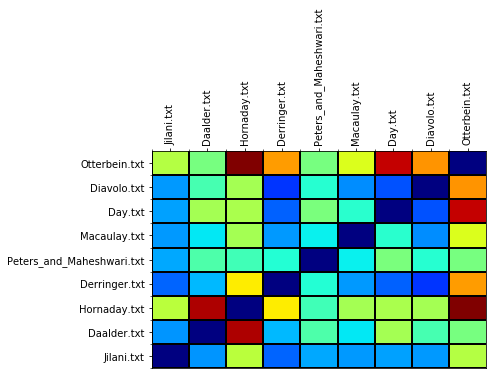

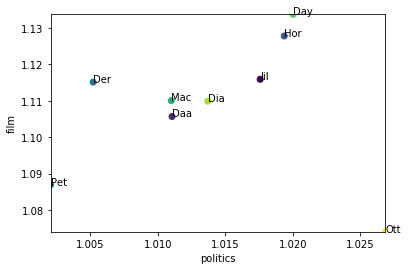

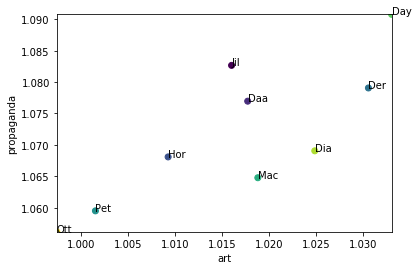

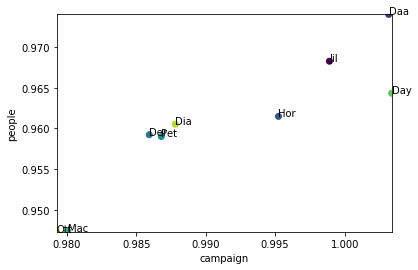

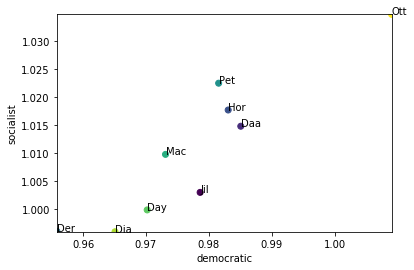

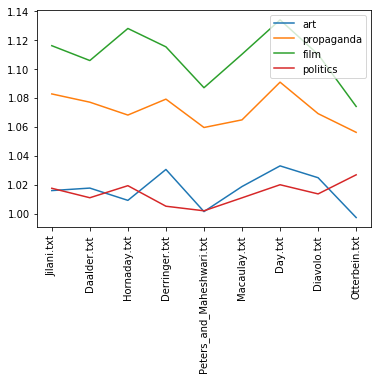

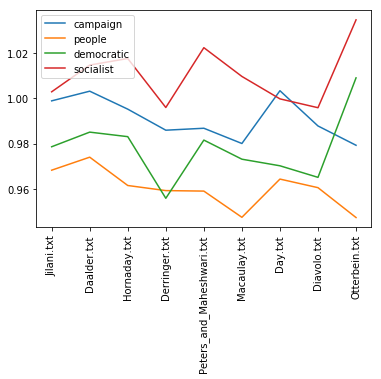

In [86]:
documents = os.listdir(os.getcwd() + "/../articles_text/")
data = {"Article" : documents}
for i in range(len(model["do"])):
    data["feature" + str(i)] = []

for document in documents:
    score = gen_score("./../articles_text/" + document)
    for i in range(len(score)):
        data["feature" + str(i)].append(score[i])

data = pd.DataFrame(data)
data.set_index("Article", drop = True,inplace=True)
distances = []
ordered_documents = ['Jilani.txt','Daalder.txt','Hornaday.txt', 'Derringer.txt','Peters_and_Maheshwari.txt',  
                     'Macaulay.txt', 'Day.txt','Diavolo.txt',  'Otterbein.txt']

for i in range(len(documents)):
    document = ordered_documents[i]
    distances.append([])
    for to_compare in ordered_documents:
        distances[i].append(get_distance(data.loc[document], data.loc[to_compare]))
heatmap(np.array(distances),ordered_documents)

points = []
for document in ordered_documents:
    points.append(data.loc[document])

scatterplot("politics","film", np.array(points), ordered_documents)
scatterplot("art","propaganda", np.array(points), ordered_documents)
scatterplot("campaign","people", np.array(points), ordered_documents)
scatterplot("democratic","socialist", np.array(points), ordered_documents)
linegraph(["art","propaganda", "film", "politics"], np.array(points), ordered_documents)
linegraph(["campaign","people", "democratic", "socialist"], np.array(points), ordered_documents)